In [35]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [36]:
df = pd.read_csv("/home/momo/Downloads/dataset for prec/joined data/joined_data.csv")
df.set_index("datetime")

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,date,precipitation
datetime,,,,,,,,,,,,,,,,,,,,,
2016-07-01,VNKT,71.5,67.9,69.9,71.5,67.9,69.9,68.9,96.8,0.098,...,NaN,2016-07-01T05:11:29,2016-07-01T19:03:16,0.89,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"44454099999,VNKT,remote,44449099999",2016-07-01,53.1000
2016-07-02,VNKT,80.5,67.9,71.0,83.7,67.9,71.1,69.0,93.9,2.559,...,NaN,2016-07-02T05:11:52,2016-07-02T19:03:15,0.92,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"44454099999,VNKT,44449099999",2016-07-02,13.7000
2016-07-03,VNKT,84.1,69.7,73.8,88.3,69.7,74.4,69.8,88.4,0.083,...,NaN,2016-07-03T05:12:15,2016-07-03T19:03:14,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"44454099999,VNKT,44449099999",2016-07-03,2.0000
2016-07-04,VNKT,80.5,69.7,74.7,84.4,69.7,75.6,69.4,84.5,0.665,...,NaN,2016-07-04T05:12:39,2016-07-04T19:03:11,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"44454099999,VNKT,remote,44449099999",2016-07-04,16.8000
2016-07-05,VNKT,80.5,71.5,75.7,84.4,71.5,76.4,69.9,82.7,0.157,...,NaN,2016-07-05T05:13:04,2016-07-05T19:03:06,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"44454099999,VNKT,44449099999",2016-07-05,3.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-26,VNKT,84.1,71.5,76.7,89.4,71.5,78.1,71.6,85.9,0.382,...,30.0,2025-06-26T05:09:50,2025-06-26T19:03:04,0.03,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"44454099999,VNKT,44449099999",2025-06-26,9.9000
2025-06-27,VNKT,82.3,69.7,76.7,87.0,69.7,78.0,71.1,84.0,0.634,...,30.0,2025-06-27T05:10:09,2025-06-27T19:03:10,0.06,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"44454099999,VNKT",2025-06-27,18.8000
2025-06-28,VNKT,82.3,71.5,76.1,85.2,71.5,76.8,70.5,84.3,0.488,...,10.0,2025-06-28T05:10:28,2025-06-28T19:03:15,0.09,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,VNKT,2025-06-28,3.8000


In [37]:
df.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,date,precipitation
0,VNKT,2016-07-01,71.5,67.9,69.9,71.5,67.9,69.9,68.9,96.8,...,NaN,2016-07-01T05:11:29,2016-07-01T19:03:16,0.89,"Rain, Overcast",Cloudy skies throughout the day with afternoon...,rain,"44454099999,VNKT,remote,44449099999",2016-07-01,53.1
1,VNKT,2016-07-02,80.5,67.9,71.0,83.7,67.9,71.1,69.0,93.9,...,NaN,2016-07-02T05:11:52,2016-07-02T19:03:15,0.92,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"44454099999,VNKT,44449099999",2016-07-02,13.7


In [38]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'date', 'precipitation'],
      dtype='object')

In [39]:
# dropping irrelevant features
df.drop(columns=['name' ,'feelslikemax',
       'feelslikemin', 'feelslike','precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth','uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'description', 'icon', 'stations',"date","windgust","cloudcover"],axis=1, inplace=True)

In [40]:
df.shape

(3287, 14)

In [41]:
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,visibility,solarradiation,solarenergy,conditions,precipitation
0,2016-07-01,71.5,67.9,69.9,68.9,96.8,9.2,78.4,1009.1,3.3,53.0,4.6,"Rain, Overcast",53.1000
1,2016-07-02,80.5,67.9,71.0,69.0,93.9,9.2,172.1,1009.8,4.2,105.7,8.9,"Rain, Overcast",13.7000
2,2016-07-03,84.1,69.7,73.8,69.8,88.4,12.8,216.1,1007.7,4.4,145.6,12.5,"Rain, Partially cloudy",2.0000
3,2016-07-04,80.5,69.7,74.7,69.4,84.5,5.8,177.7,1006.3,4.7,151.3,13.0,"Rain, Partially cloudy",16.8000
4,2016-07-05,80.5,71.5,75.7,69.9,82.7,11.4,110.0,1005.7,4.8,145.0,12.5,"Rain, Partially cloudy",3.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,4.6,301.5,26.1,"Rain, Partially cloudy",9.9000
3283,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,5.1,266.0,23.1,"Rain, Partially cloudy",18.8000
3284,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,4.5,262.4,22.5,"Rain, Partially cloudy",3.8000
3285,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,4.4,153.8,13.3,"Rain, Partially cloudy",16.9672


In [42]:
converision = lambda x: round((5/9) * (x - 32),1)
df["tempmax"] = df["tempmax"].apply(converision)
df["tempmin"] = df["tempmin"].apply(converision)
df["temp"] = df["temp"].apply(converision)

In [43]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'windspeed', 'winddir', 'sealevelpressure', 'visibility',
       'solarradiation', 'solarenergy', 'conditions', 'precipitation'],
      dtype='object')

In [44]:
df.describe()

,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,visibility,solarradiation,solarenergy,precipitation
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,24.442622,14.076179,18.616946,56.303955,75.341253,11.240067,211.830788,1015.409370,4.064679,184.084941,15.889808,3.827520
std,4.275151,6.101357,5.062757,11.475371,11.599571,5.988995,57.687684,4.393349,1.636586,58.409234,5.045751,10.494321
min,8.900000,0.100000,6.700000,29.000000,25.200000,3.400000,1.000000,1001.300000,1.400000,0.000000,0.000000,0.000000
25%,20.900000,8.900000,14.100000,45.900000,69.500000,9.200000,183.600000,1012.100000,3.600000,148.900000,12.900000,0.000000
50%,24.900000,14.900000,19.900000,56.500000,76.600000,10.300000,214.500000,1015.700000,4.100000,181.000000,15.600000,0.000000
75%,27.900000,19.900000,23.200000,68.200000,83.600000,12.800000,251.050000,1018.800000,4.500000,221.300000,19.100000,1.800000
max,38.900000,23.900000,27.200000,74.300000,100.000000,165.800000,356.800000,1025.600000,88.600000,340.700000,29.600000,164.300000


In [45]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns =numeric_columns.delete(-1) #delete precipitation as it's target

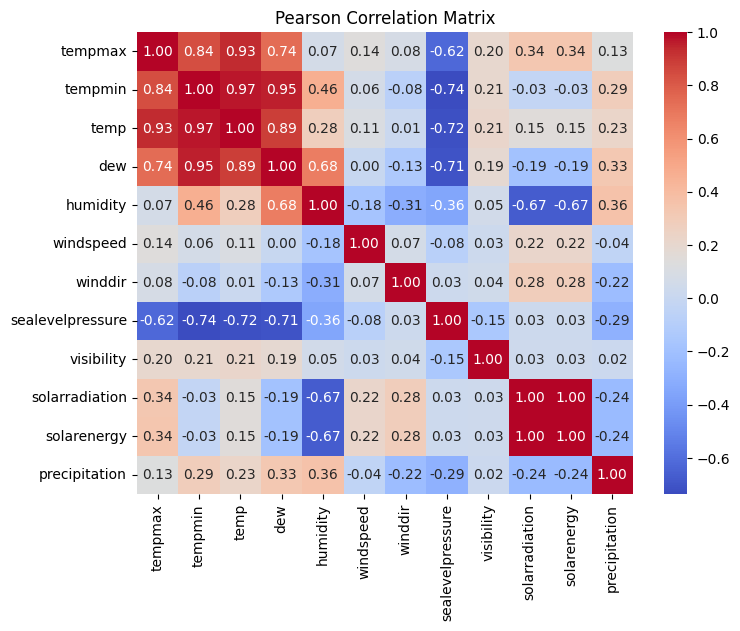

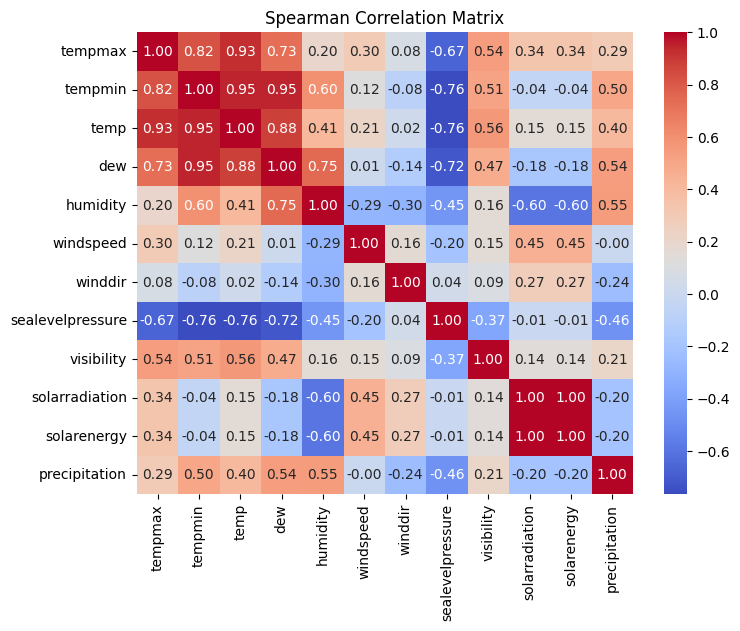

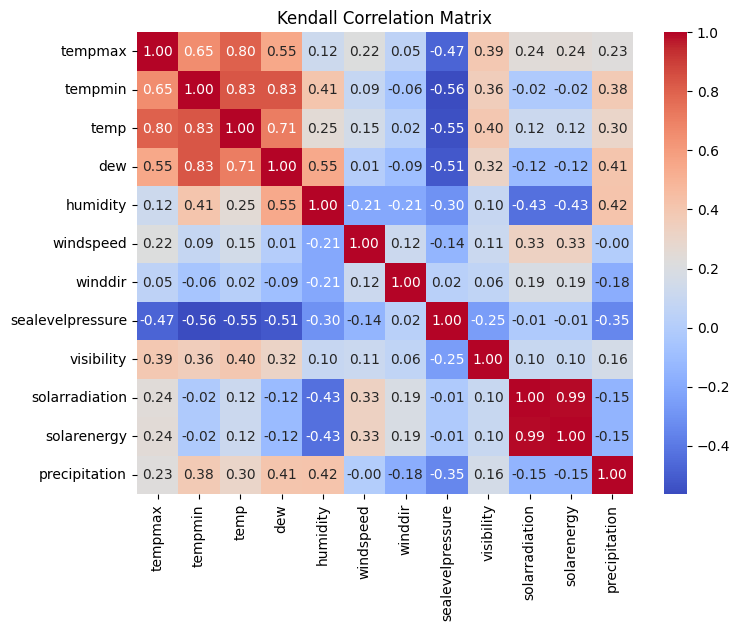

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt

def plot_individual_correlation_matrices(df):
    """
    Plots individual correlation matrices for Pearson, Spearman, and Kendall methods.
    """
    # Compute correlation matrices
    pearson_corr = df.corr(method='pearson')
    spearman_corr = df.corr(method='spearman')
    kendall_corr = df.corr(method='kendall')

    # Function to plot a single heatmap
    def plot_heatmap(corr_matrix, title, cmap='coolwarm'):
        plt.figure(figsize=(8, 6))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", cbar=True)
        plt.title(title)  # Add a title
        plt.show()

    # Plot Pearson Correlation Matrix
    plot_heatmap(pearson_corr, "Pearson Correlation Matrix")

    # Plot Spearman Correlation Matrix
    plot_heatmap(spearman_corr, "Spearman Correlation Matrix")

    # Plot Kendall Correlation Matrix
    plot_heatmap(kendall_corr, "Kendall Correlation Matrix")

# Example usage:
# Assuming numeric_columns is a DataFrame with only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
plot_individual_correlation_matrices(numeric_columns)


<Figure size 800x600 with 0 Axes>

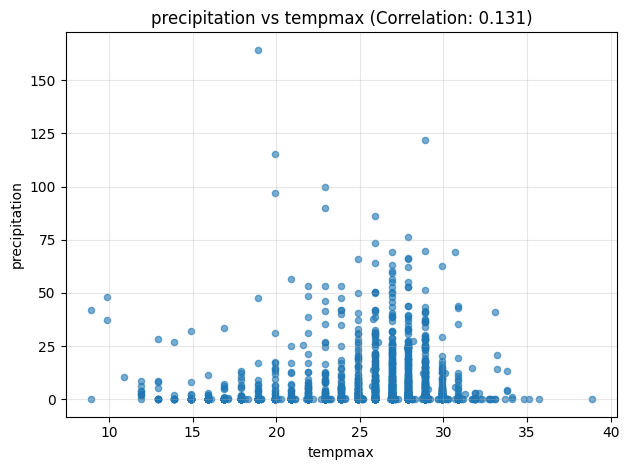

<Figure size 800x600 with 0 Axes>

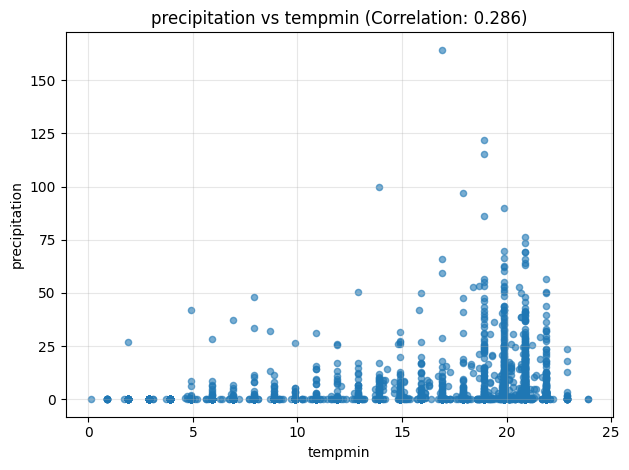

<Figure size 800x600 with 0 Axes>

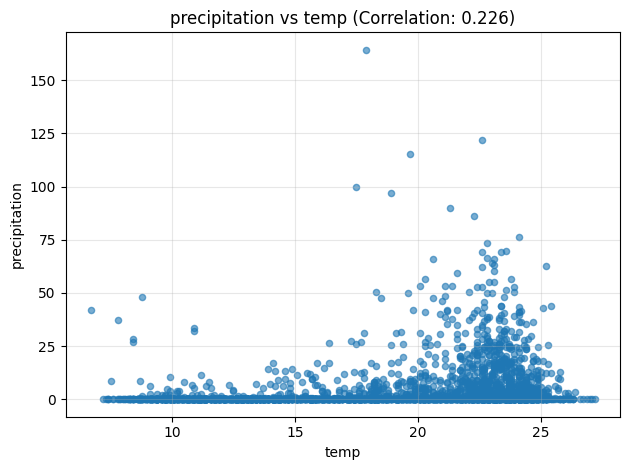

<Figure size 800x600 with 0 Axes>

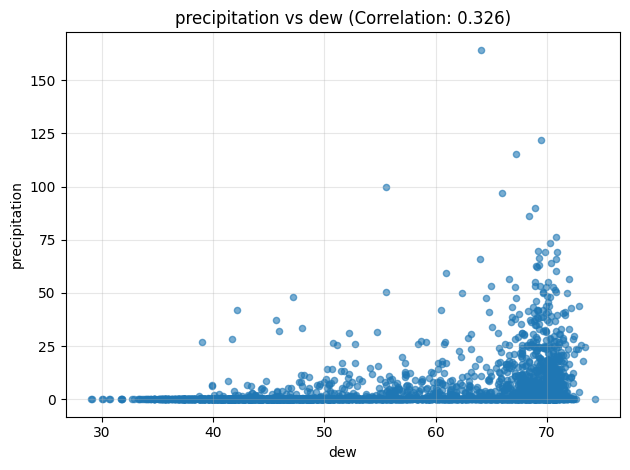

<Figure size 800x600 with 0 Axes>

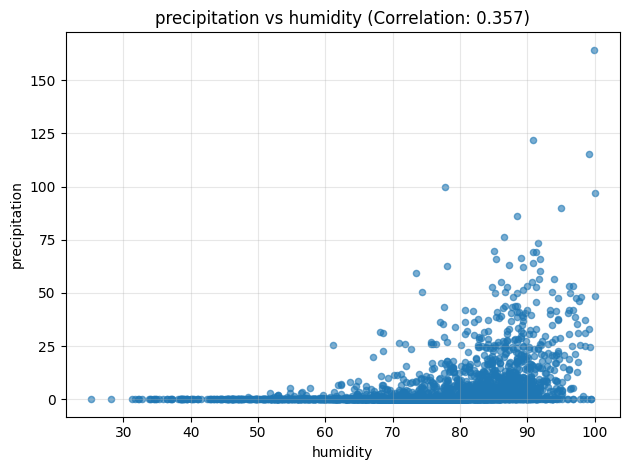

<Figure size 800x600 with 0 Axes>

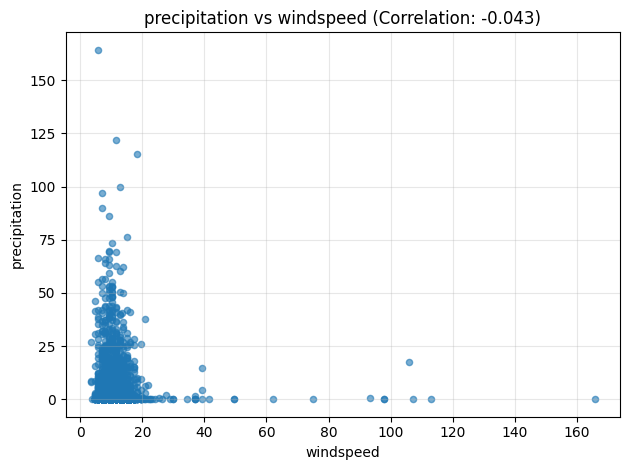

<Figure size 800x600 with 0 Axes>

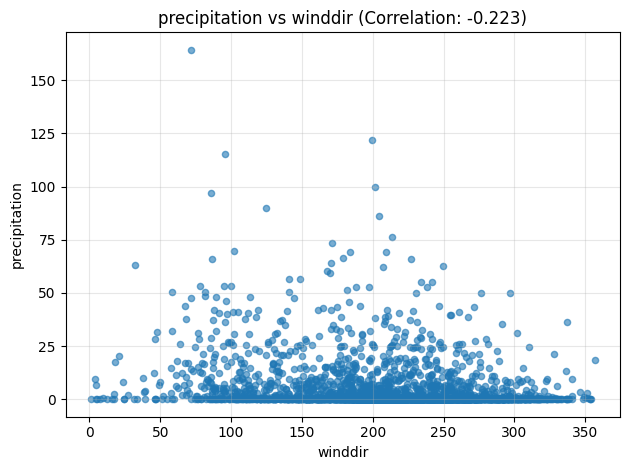

<Figure size 800x600 with 0 Axes>

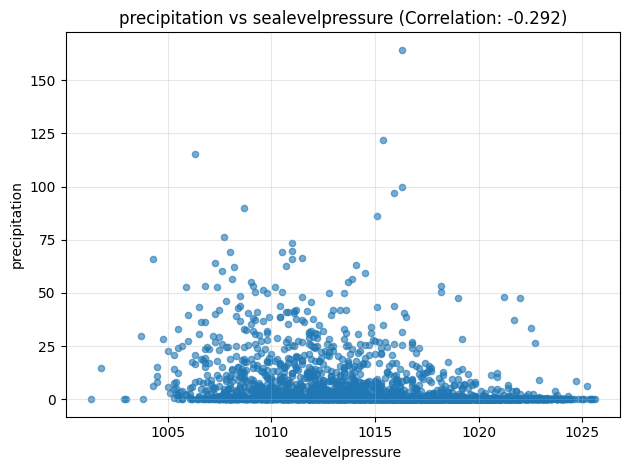

<Figure size 800x600 with 0 Axes>

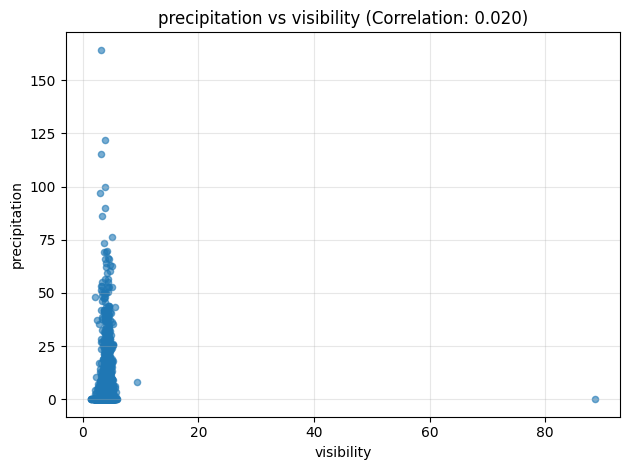

<Figure size 800x600 with 0 Axes>

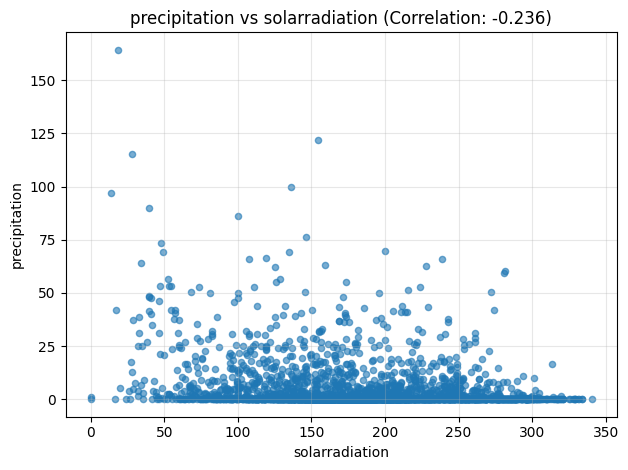

<Figure size 800x600 with 0 Axes>

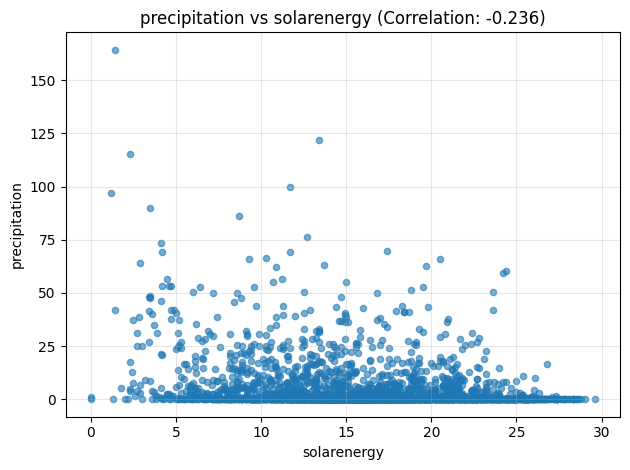

In [47]:
def quick_scatter_plots(df, target_column):
    """Quick scatter plots using pandas built-in plotting"""
    
    other_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                  if col != target_column]
    
    for col in other_cols:
        plt.figure(figsize=(8, 6))
        df.plot.scatter(x=col, y=target_column, alpha=0.6)
        plt.title(f'{target_column} vs {col}')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        # Add correlation in title
        corr = df[target_column].corr(df[col])
        plt.title(f'{target_column} vs {col} (Correlation: {corr:.3f})')
        plt.show()

# Usage
quick_scatter_plots(df, 'precipitation')

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='conditions', y='precipitation', data=df)
plt.savefig('boxplot.png', dpi=300)  # Save as a high-resolution PNG
plt.close()  # Close the plot to free memory

###### dropping windspeed, winddir, visibility, solarradiation, solarenergy 

In [49]:
df.drop(columns=["visibility","solarradiation","solarenergy","conditions","tempmax","tempmin"],inplace=True)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

In [50]:
df.dtypes

datetime             object
temp                float64
dew                 float64
humidity            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
precipitation       float64
dtype: object

In [51]:
df.shape

(3287, 8)

In [52]:
df.duplicated().sum()

0

In [53]:
df.isna().sum()

datetime            0
temp                0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
precipitation       0
dtype: int64

In [54]:
df.to_csv("/home/momo/Downloads/dataset for prec/cleaned_data/01-cleaned.csv",index=False)

In [55]:
df = pd.read_csv("/home/momo/Downloads/dataset for prec/cleaned_data/01-cleaned.csv")
df.head()

,datetime,temp,dew,humidity,windspeed,winddir,sealevelpressure,precipitation
0,2016-07-01,21.1,68.9,96.8,9.2,78.4,1009.1,53.1
1,2016-07-02,21.7,69.0,93.9,9.2,172.1,1009.8,13.7
2,2016-07-03,23.2,69.8,88.4,12.8,216.1,1007.7,2.0
3,2016-07-04,23.7,69.4,84.5,5.8,177.7,1006.3,16.8
4,2016-07-05,24.3,69.9,82.7,11.4,110.0,1005.7,3.8


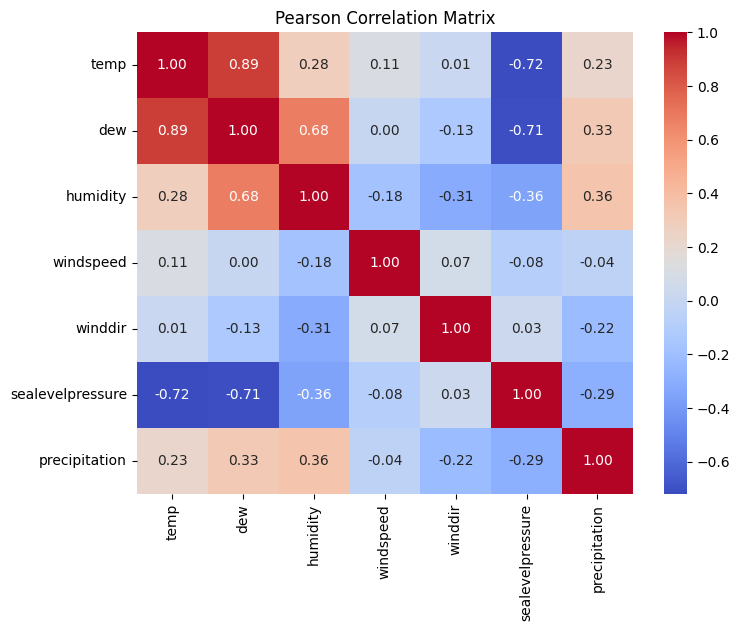

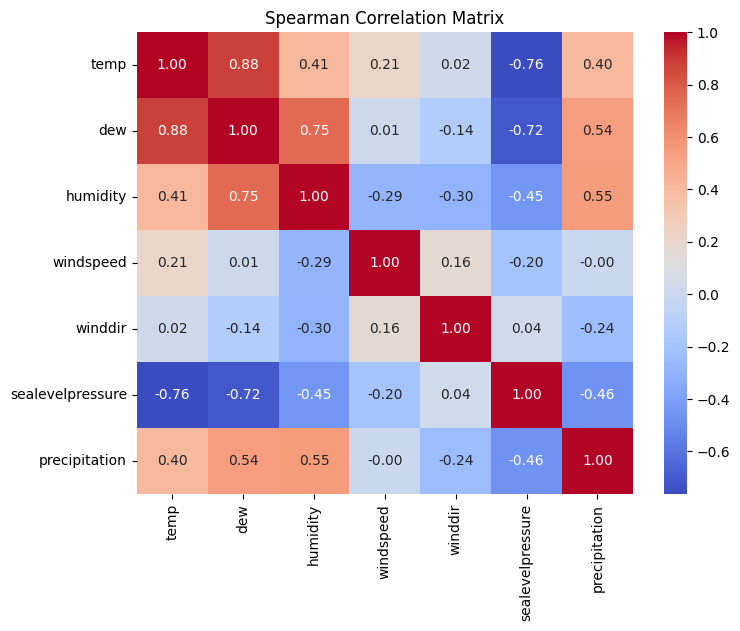

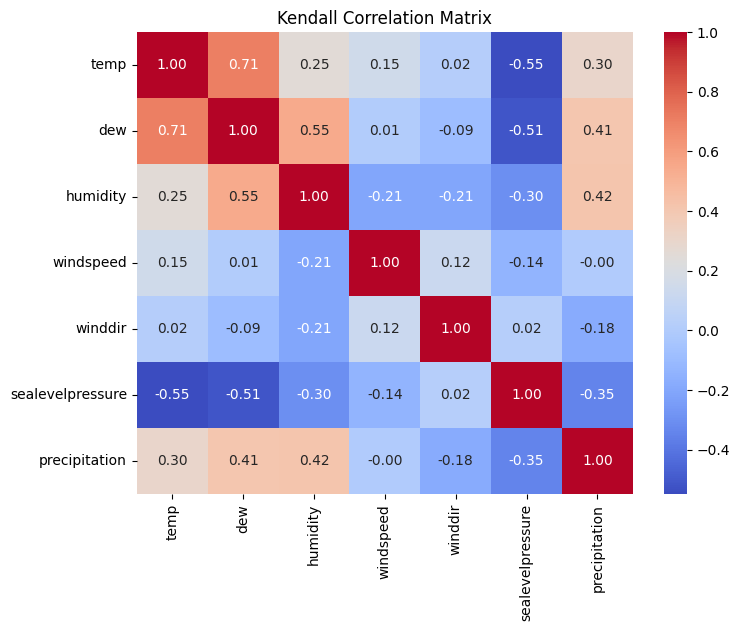

In [56]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Function to plot individual correlation matrices
def plot_individual_correlation_matrices(df):
    """
    Plots individual correlation matrices for Pearson, Spearman, and Kendall methods.
    """
    # Compute correlation matrices
    pearson_corr = df.corr(method='pearson')
    spearman_corr = df.corr(method='spearman')
    kendall_corr = df.corr(method='kendall')

    # Function to plot a single heatmap
    def plot_heatmap(corr_matrix, title, cmap='coolwarm'):
        plt.figure(figsize=(8, 6))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", cbar=True)
        plt.title(title)  # Add a title
        plt.show()

    # Plot Pearson Correlation Matrix
    plot_heatmap(pearson_corr, "Pearson Correlation Matrix")

    # Plot Spearman Correlation Matrix
    plot_heatmap(spearman_corr, "Spearman Correlation Matrix")

    # Plot Kendall Correlation Matrix
    plot_heatmap(kendall_corr, "Kendall Correlation Matrix")



# Call the functions
plot_individual_correlation_matrices(numeric_columns)


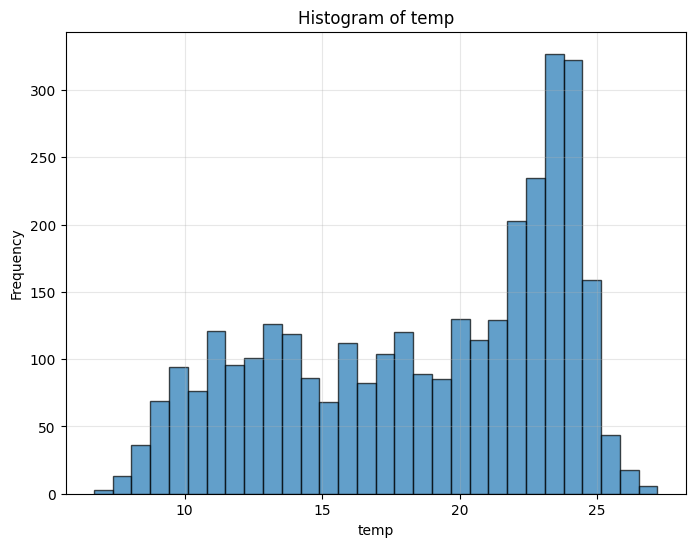

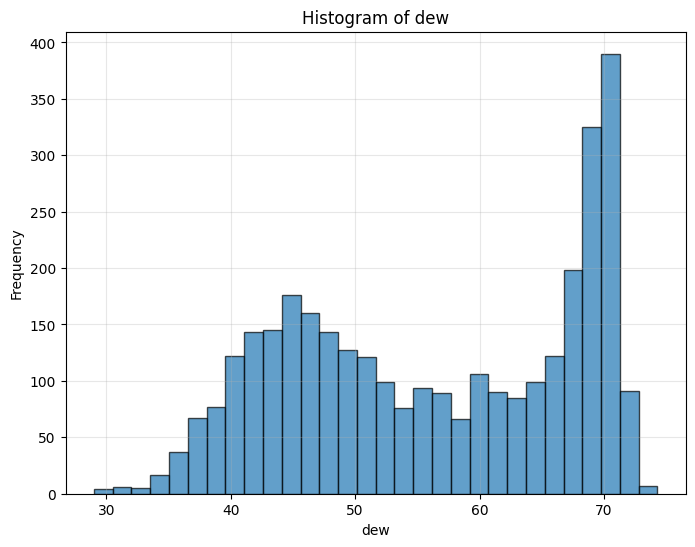

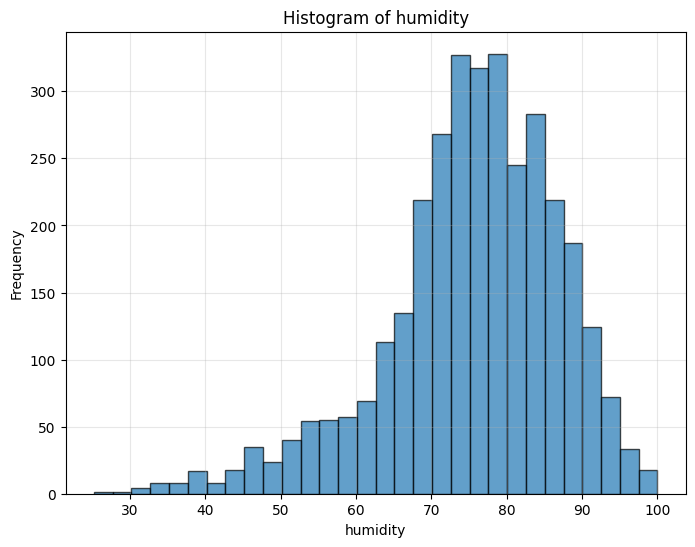

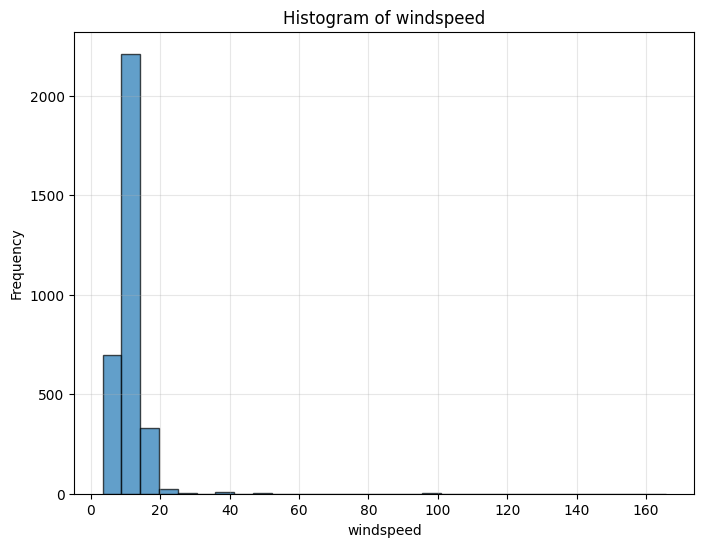

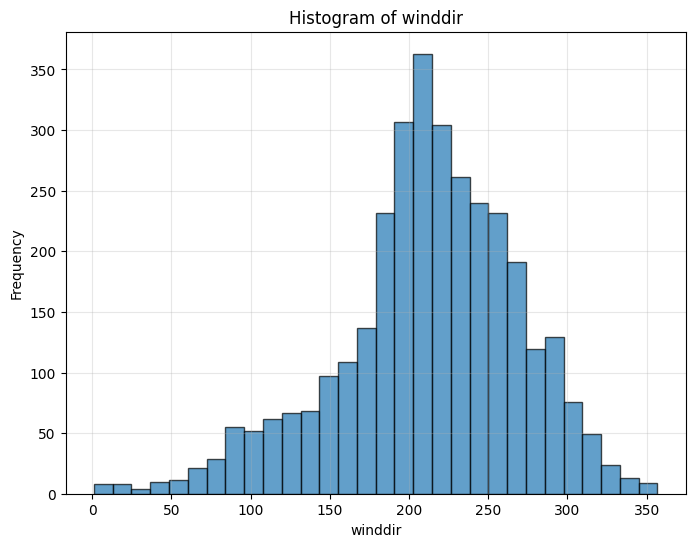

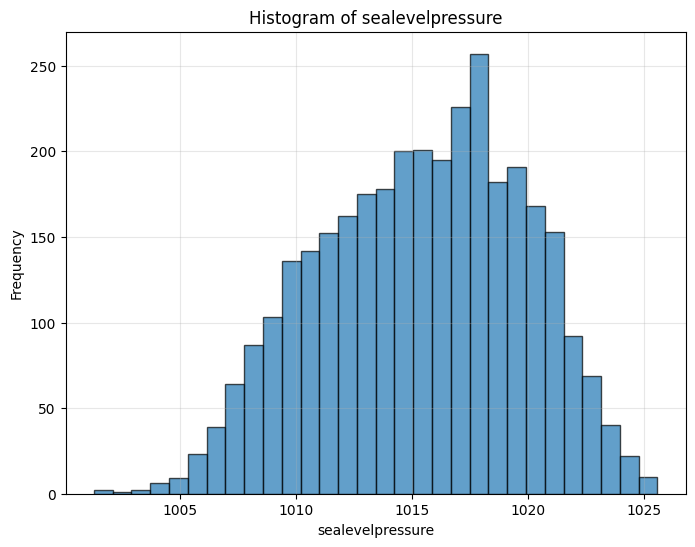

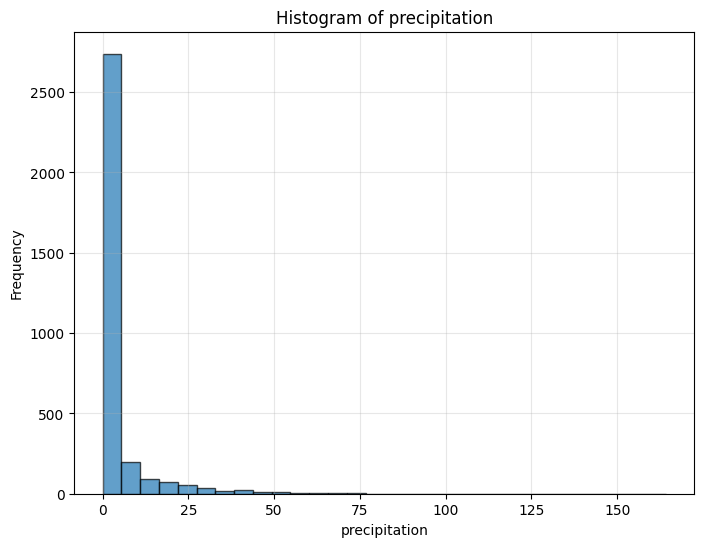

In [57]:
# Create individual plots for each column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

In [58]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols.delete(-1) #removing precipitation

Index(['temp', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure'], dtype='object')

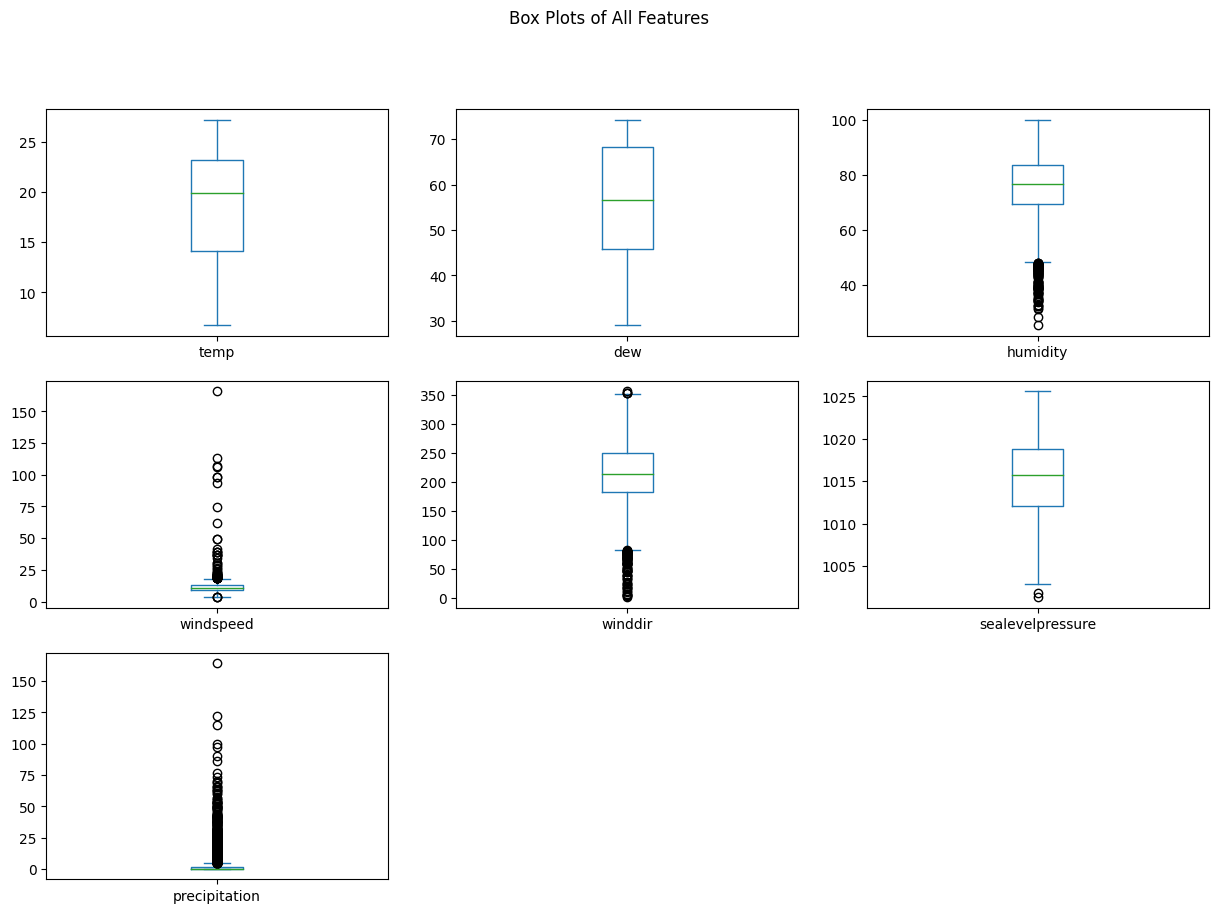

In [59]:
# Simple one-liner
df.plot(kind='box', subplots=True, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Box Plots of All Features')
plt.show()

In [60]:
df

,datetime,temp,dew,humidity,windspeed,winddir,sealevelpressure,precipitation
0,2016-07-01,21.1,68.9,96.8,9.2,78.4,1009.1,53.1000
1,2016-07-02,21.7,69.0,93.9,9.2,172.1,1009.8,13.7000
2,2016-07-03,23.2,69.8,88.4,12.8,216.1,1007.7,2.0000
3,2016-07-04,23.7,69.4,84.5,5.8,177.7,1006.3,16.8000
4,2016-07-05,24.3,69.9,82.7,11.4,110.0,1005.7,3.8000
...,...,...,...,...,...,...,...,...
3282,2025-06-26,24.8,71.6,85.9,11.4,220.1,1011.7,9.9000
3283,2025-06-27,24.8,71.1,84.0,12.8,237.0,1010.3,18.8000
3284,2025-06-28,24.5,70.5,84.3,11.4,278.3,1009.3,3.8000
3285,2025-06-29,23.1,71.4,94.2,16.1,223.2,1006.8,16.9672


In [61]:
df.describe()

,temp,dew,humidity,windspeed,winddir,sealevelpressure,precipitation
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,18.616946,56.303955,75.341253,11.240067,211.830788,1015.409370,3.827520
std,5.062757,11.475371,11.599571,5.988995,57.687684,4.393349,10.494321
min,6.700000,29.000000,25.200000,3.400000,1.000000,1001.300000,0.000000
25%,14.100000,45.900000,69.500000,9.200000,183.600000,1012.100000,0.000000
50%,19.900000,56.500000,76.600000,10.300000,214.500000,1015.700000,0.000000
75%,23.200000,68.200000,83.600000,12.800000,251.050000,1018.800000,1.800000
max,27.200000,74.300000,100.000000,165.800000,356.800000,1025.600000,164.300000


In [62]:
df

,datetime,temp,dew,humidity,windspeed,winddir,sealevelpressure,precipitation
0,2016-07-01,21.1,68.9,96.8,9.2,78.4,1009.1,53.1000
1,2016-07-02,21.7,69.0,93.9,9.2,172.1,1009.8,13.7000
2,2016-07-03,23.2,69.8,88.4,12.8,216.1,1007.7,2.0000
3,2016-07-04,23.7,69.4,84.5,5.8,177.7,1006.3,16.8000
4,2016-07-05,24.3,69.9,82.7,11.4,110.0,1005.7,3.8000
...,...,...,...,...,...,...,...,...
3282,2025-06-26,24.8,71.6,85.9,11.4,220.1,1011.7,9.9000
3283,2025-06-27,24.8,71.1,84.0,12.8,237.0,1010.3,18.8000
3284,2025-06-28,24.5,70.5,84.3,11.4,278.3,1009.3,3.8000
3285,2025-06-29,23.1,71.4,94.2,16.1,223.2,1006.8,16.9672


In [63]:
df.to_csv("cleaned_data/02-cleaned.csv",index=False)